# Question

During campus interviews, company XYZ typically evaluates students based on their test scores from the company's assessment, their % of mark, and interview performance. However, moving forward, the company has decided not to interview all students and instead needs to filter candidates before scheduling interviews.

The company possesses historical data that includes test scores, CGPA, and selection outcomes for previous candidates. This data will be utilized to predict whether a new candidate, with a specific test score and CGPA, will be selected for an interview or not.

Data Set: interviewData.csv

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'E:\DUK\Predictive Analytics\Interview Problem\interviewData.csv')
df.columns = ['Exam Mark','Test Score','Selection']
df.head()

,Exam Mark,Test Score,Selection
0,30.286711,43.894998,No
1,35.847409,72.902198,No
2,60.182599,86.308552,Yes
3,79.032736,75.344376,Yes
4,45.083277,56.316372,No


In [14]:
display(df)

,Exam Mark,Test Score,Selection
0,30.286711,43.894998,No
1,35.847409,72.902198,No
2,60.182599,86.308552,Yes
3,79.032736,75.344376,Yes
4,45.083277,56.316372,No
...,...,...,...
94,83.489163,48.380286,Yes
95,42.261701,87.103851,Yes
96,99.315009,68.775409,Yes
97,55.340018,64.931938,Yes


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Exam Mark   99 non-null     float64
 1   Test Score  99 non-null     float64
 2   Selection   99 non-null     object 
dtypes: float64(2), object(1)
memory usage: 2.4+ KB
None


In [16]:
print(df.describe())

       Exam Mark  Test Score
count  99.000000   99.000000
mean   65.957614   66.102779
std    19.302009   18.638875
min    30.058822   30.603263
25%    51.297736   47.978125
50%    67.319257   66.589353
75%    80.234877   79.876423
max    99.827858   98.869436


In [17]:
print(df.isnull().sum())

Exam Mark     0
Test Score    0
Selection     0
dtype: int64


In [18]:
print(df.duplicated().sum())

0


In [19]:
print(df.dtypes)

Exam Mark     float64
Test Score    float64
Selection      object
dtype: object


## Exploratory data analysis


**Answer the following:**
* What is your target variable?
> Selection
* Do you need to encode the target variable (Yes/No)?
> Yes.
* If yes, briefly explain why you need to encode the target variable.
> We may need to encode the target variable "Selection" if it is not already in a numerical format. This is necessary for many machine learning algorithms that require numerical input. If "Selection" is categorical (e.g., 'Yes'/'No', 'Selected'/'Not Selected'), it should be converted into numerical values (e.g., 1/0) before applying these algorithms.
* Consider the encoding methods: One-hot encoding, Binary encoding, and Label Encoding. Which one do you apply in this case?
> In this case, Label Encoding is the most appropriate method.
* Explain why you have selected the above encoding method.
> It will map one category to 0 and the other to 1, which is straightforward and efficient for binary classification tasks.

Read the following article

https://medium.com/@swayampatil7918/exploring-different-encoding-techniques-for-machine-learning-models-b762e3b546db

In [25]:
# Create a new dataset by apply the encoding  method selected above on the dataset
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Fit and transform the target variable
df['Selection'] = le.fit_transform(df['Selection'])

# Display the first few rows of the new dataset to verify the changes
print(df.head())

   Exam Mark  Test Score  Selection
0  30.286711   43.894998          0
1  35.847409   72.902198          0
2  60.182599   86.308552          1
3  79.032736   75.344376          1
4  45.083277   56.316372          0


In [26]:
display(df)

,Exam Mark,Test Score,Selection
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
...,...,...,...
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1


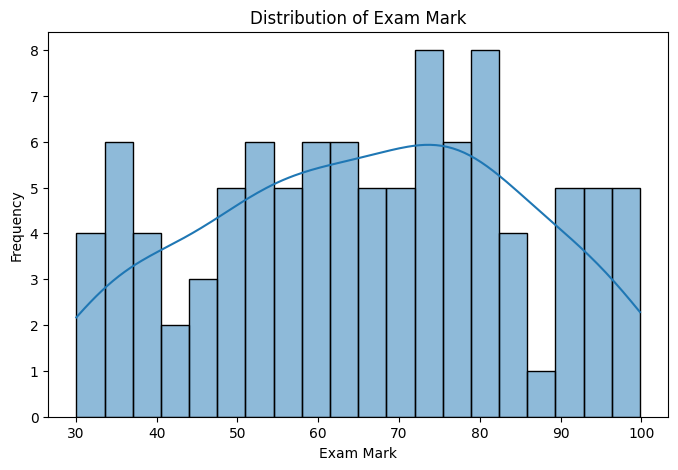

In [27]:
# Distribution of 'Exam Mark'
plt.figure(figsize=(8, 5))
sns.histplot(df['Exam Mark'], kde=True, bins=20)
plt.title('Distribution of Exam Mark')
plt.xlabel('Exam Mark')
plt.ylabel('Frequency')
plt.show()

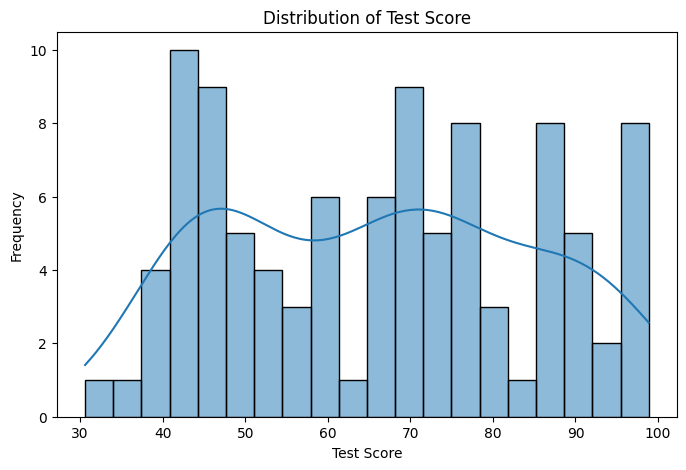

In [28]:
# Distribution of 'Test Score'
plt.figure(figsize=(8, 5))
sns.histplot(df['Test Score'], kde=True, bins=20)
plt.title('Distribution of Test Score')
plt.xlabel('Test Score')
plt.ylabel('Frequency')
plt.show()

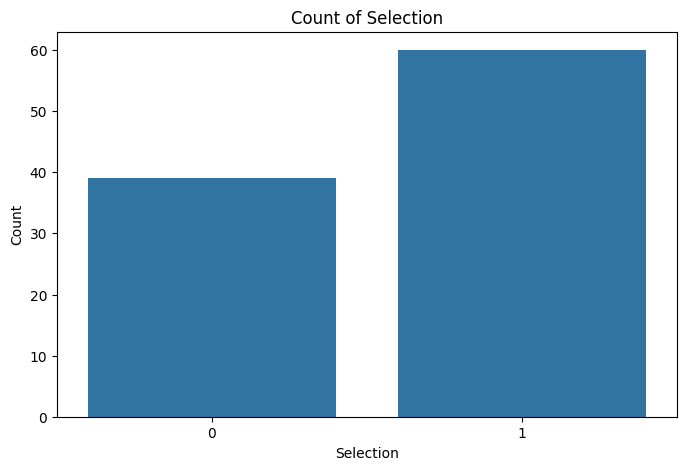

In [29]:
# Countplot for 'Selection'
plt.figure(figsize=(8, 5))
sns.countplot(x='Selection', data=df)
plt.title('Count of Selection')
plt.xlabel('Selection')
plt.ylabel('Count')
plt.show()

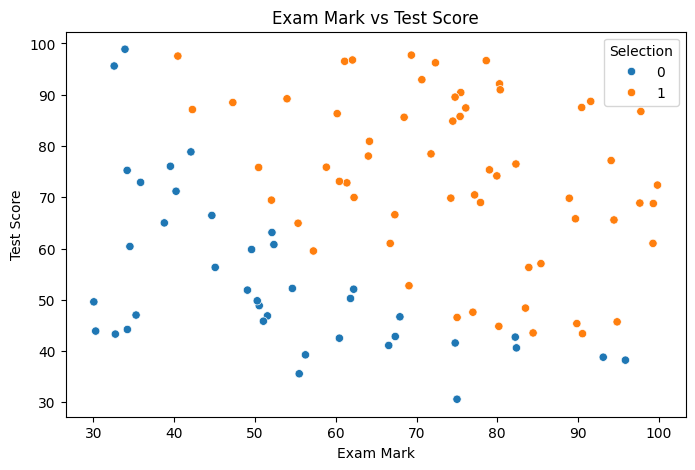

In [30]:
# Scatter plot of 'Exam Mark' vs 'Test Score'
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Exam Mark', y='Test Score', hue='Selection', data=df)
plt.title('Exam Mark vs Test Score')
plt.xlabel('Exam Mark')
plt.ylabel('Test Score')
plt.show()

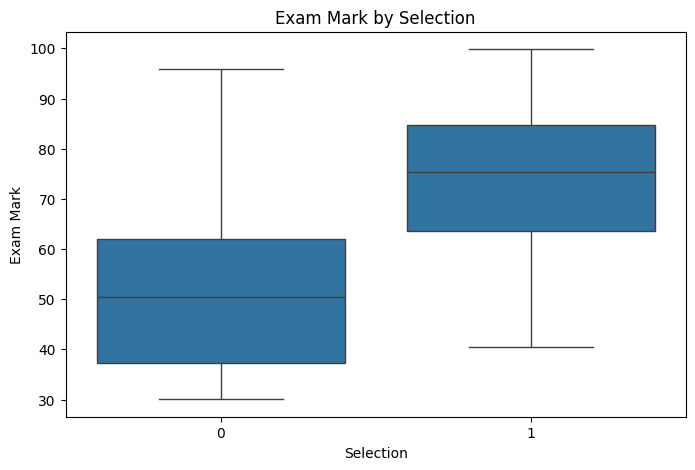

In [31]:
# Box plot of 'Exam Mark' by 'Selection'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Selection', y='Exam Mark', data=df)
plt.title('Exam Mark by Selection')
plt.xlabel('Selection')
plt.ylabel('Exam Mark')
plt.show()

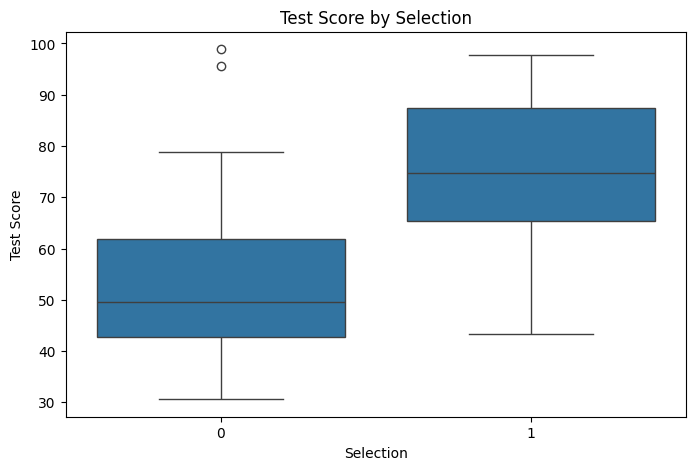

In [32]:
# Box plot of 'Test Score' by 'Selection'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Selection', y='Test Score', data=df)
plt.title('Test Score by Selection')
plt.xlabel('Selection')
plt.ylabel('Test Score')
plt.show()

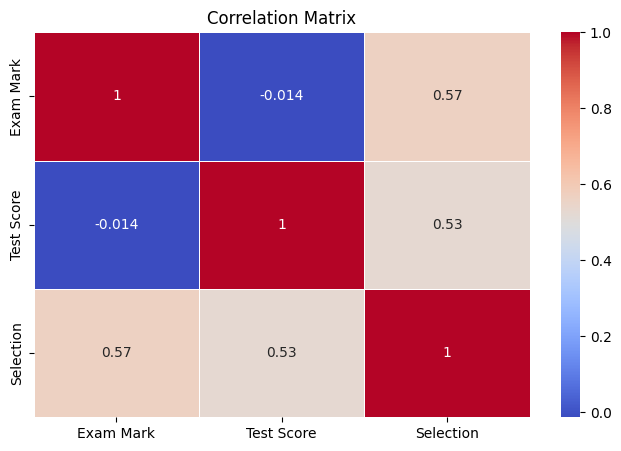

In [33]:
# Correlation matrix
plt.figure(figsize=(8, 5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Logistic Regression Model

logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ \hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$

  where

  $$g(z) = \frac{1}{1+e^{-z}}$$

That is
$$\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \frac{1}{1+e^{-(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )}}$$

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into features (X) and target (y)
X = df[['Exam Mark', 'Test Score']]
y = df['Selection']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Initialize the logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.85


In [42]:
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[10  2]
 [ 1  7]]


In [43]:
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.78      0.88      0.82         8

    accuracy                           0.85        20
   macro avg       0.84      0.85      0.85        20
weighted avg       0.86      0.85      0.85        20



C:\Users\Harsh Vardhan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


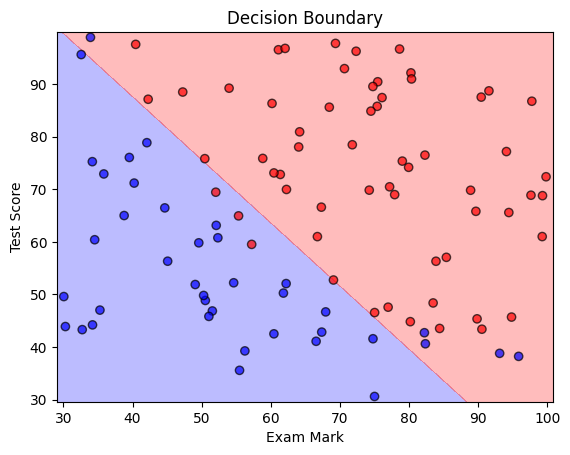

In [44]:
# Visualize the decision boundary
x_min, x_max = X['Exam Mark'].min() - 1, X['Exam Mark'].max() + 1
y_min, y_max = X['Test Score'].min() - 1, X['Test Score'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X['Exam Mark'], X['Test Score'], c=y, edgecolors='k', cmap='bwr', alpha=0.7)
plt.xlabel('Exam Mark')
plt.ylabel('Test Score')
plt.title('Decision Boundary')
plt.show()

### Answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * Your answer
* Explain why you said yes or no to the above questions.
> * Your answer

### Log Loss/ Sigmoid Cross Entropy for Logistic regression

     


$$ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(\hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - \hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$

### Cost function


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

### Answer the following


* What is a loss function?
> * Your response
* What is a cost function?
> * Your response
* What is the distinction between them?
> * Your response

### Derivative of the cost function with respect to weights

Type here the formulas to compute the derivatives of the const function with respect to $w_1$, $w_2$ and b

In [46]:
import numpy as np

def sigmoid(z):
    """Sigmoid function."""
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    
    # Compute the cost
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [48]:
# write a function to estimate the derivatives of the cost function

def compute_gradient(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    
    # Compute the gradient
    gradient = (1/m) * X.T @ (h - y)
    print("h:", h)
    print("cost:", gradient)
    return gradient

### Gradient Descent Algorithm

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

## Model Training

In [50]:
def sigmoid(z):
    """Sigmoid function."""
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, w, b):
    """Compute the cost function."""
    m = len(y)
    z = np.dot(X, w) + b
    h = sigmoid(z)
    
    # Adjust probabilities to avoid exactly 0 or 1
    epsilon = 1e-15
    h = np.maximum(np.minimum(h, 1 - epsilon), epsilon)
    
    cost = -1/m * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def compute_gradient(X, y, w, b):
    """Compute the gradient of the cost function."""
    m = len(y)
    z = np.dot(X, w) + b
    h = sigmoid(z)
    dw = 1/m * np.dot(X.T, (h - y))
    db = 1/m * np.sum(h - y)
    return dw, db

def gradient_descent(w, b, X_train, X_test, y_train, y_test, alpha, num_iter):
    """Gradient Descent."""
    J_train = []
    J_test = []
    for i in range(num_iter):
        # Compute gradients
        dw, db = compute_gradient(X_train, y_train, w, b)
        
        # Update parameters
        w -= alpha * dw
        b -= alpha * db
        
        # Compute cost
        J_train.append(compute_cost(X_train, y_train, w, b))
        J_test.append(compute_cost(X_test, y_test, w, b))
        
        if i % 100 == 0:
            print(f"Iteration {i}, Training Cost: {J_train[-1]}, Test Cost: {J_test[-1]}")
    
    return w, b, J_train, J_test

# Split the data into train and test datasets
from sklearn.model_selection import train_test_split

# Split the dataset such that 20% test and 80% train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the weights and bias
np.random.seed(1)
w_ini = np.random.rand(2)
b_ini = -9

# Fix the learning rate
alpha = 0.001

# Fix the number of iterations
num_iter = 1000

# Train the model
w, b, J_train, J_test = gradient_descent(w_ini, b_ini, X_train, X_test, y_train, y_test, alpha, num_iter)

# Print final parameters
print(f"Final parameters: w: {w}, b: {b}")

Iteration 0, Training Cost: 11.80333153515881, Test Cost: 20.68908823637653
Iteration 100, Training Cost: 0.25770631366516555, Test Cost: 0.4287217995312858
Iteration 200, Training Cost: 0.25740287705959003, Test Cost: 0.44369829646266973
Iteration 300, Training Cost: 0.2573786133623081, Test Cost: 0.44371832652061727
Iteration 400, Training Cost: 0.2573543651809349, Test Cost: 0.4436894029015376
Iteration 500, Training Cost: 0.25733012967280017, Test Cost: 0.4436603373540341
Iteration 600, Training Cost: 0.257305906827959, Test Cost: 0.4436312876582964
Iteration 700, Training Cost: 0.25728169663650613, Test Cost: 0.4436022543109555
Iteration 800, Training Cost: 0.2572574990885464, Test Cost: 0.4435732373000525
Iteration 900, Training Cost: 0.2572333141741952, Test Cost: 0.44354423661199843
Final parameters: w: [0.08902704 0.06233312], b: -9.024531979511838


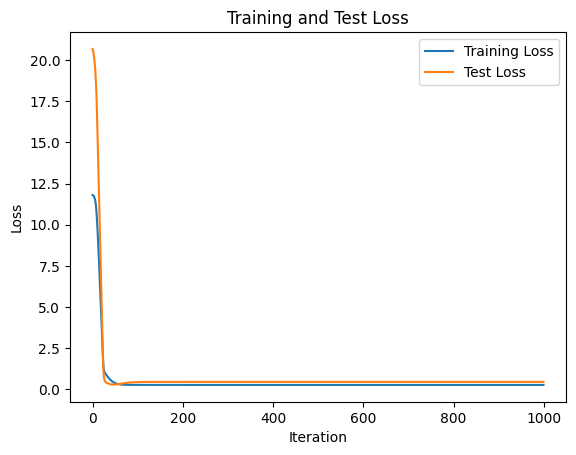

In [51]:
# Plot the training and test loss
plt.plot(range(len(J_train)), J_train, label='Training Loss')
plt.plot(range(len(J_test)), J_test, label='Test Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

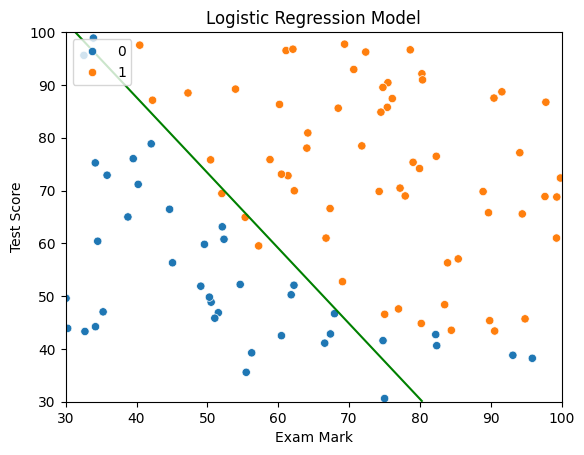

In [52]:
import seaborn as sns

# Define the boundary separation value
P = 0.5

# Generate sample points in the domain 30 to 100
u = np.linspace(30, 100, 50)
v = np.linspace(30, 100, 50)

# Make it into a 2D mesh
X, Y = np.meshgrid(u, v)
logReg = np.zeros((len(u), len(v)))

# Predict the result of the (u,v) pair data with the estimated w and b values
for i in range(len(u)):
    for j in range(len(v)):
        zz = X[i,j]*w[0] + Y[i,j]*w[1] + b
        logReg[i,j] = 1 / (1 + np.exp(-zz))

# Plot the contour plot of the logistic regression model
plt.contour(u, v, logReg, levels=[P], colors="g")

# Plot the real data
sns.scatterplot(data=df, x='Exam Mark', y='Test Score', hue='Selection')

plt.xlabel('Exam Mark')
plt.ylabel('Test Score')
plt.title('Logistic Regression Model')
plt.legend(loc='upper left')
plt.show()